In [36]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#Read the csv file with past 5 years data
crimedata=pd.read_csv('/home/ec2-user/crimedatafinal.csv')

In [38]:
#Sampling across equal proportions for all the years
crimedata['Year'].value_counts()

2018    23678
2019    23043
2020    18739
2021    18179
2022    16361
Name: Year, dtype: int64

In [39]:
#Understanding the columns of the dataset
crimedata.describe()

#Checking out unique values across all the data
uniqueValues = crimedata.nunique()
uniqueValues

Unnamed: 0               85488
index                   100000
ID                      100000
Case Number              99999
Date                     84849
Block                    22716
IUCR                       297
Primary Type                32
Description                392
Location Description       160
Arrest                       2
Domestic                     2
Beat                       274
District                    23
Ward                        50
Community Area              77
FBI Code                    26
X Coordinate             37372
Y Coordinate             46655
Year                         5
Updated On                2856
Latitude                 65141
Longitude                65129
Location                 65149
dtype: int64

In [40]:
crimedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            100000 non-null  int64  
 1   index                 100000 non-null  int64  
 2   ID                    100000 non-null  int64  
 3   Case Number           100000 non-null  object 
 4   Date                  100000 non-null  object 
 5   Block                 100000 non-null  object 
 6   IUCR                  100000 non-null  object 
 7   Primary Type          100000 non-null  object 
 8   Description           100000 non-null  object 
 9   Location Description  99553 non-null   object 
 10  Arrest                100000 non-null  bool   
 11  Domestic              100000 non-null  bool   
 12  Beat                  100000 non-null  int64  
 13  District              100000 non-null  float64
 14  Ward                  99997 non-null   float64
 15  C

In [41]:
crimedata.isnull().sum()

Unnamed: 0                 0
index                      0
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     447
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       3
Community Area             0
FBI Code                   0
X Coordinate            1479
Y Coordinate            1479
Year                       0
Updated On                 0
Latitude                1479
Longitude               1479
Location                1479
dtype: int64

<AxesSubplot:>

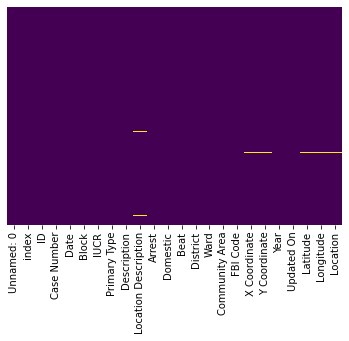

In [42]:
#Heatmap visualization for understanding the null values
sns.heatmap(crimedata.isnull(), yticklabels=False,cbar=False,cmap = "viridis")


In [43]:
#Cleaning the dataset
final_df = crimedata.drop('index', axis=1)
final_df.reset_index(inplace=True)
final_df = final_df.drop('index', axis=1)


In [44]:
#drop unnecessary columns
df = final_df.drop(['ID', 'Case Number', 'Block','X Coordinate','Y Coordinate', 'Updated On', 'Latitude', 'Longitude', 'Unnamed: 0'], axis=1)
df.to_csv('CrimeFinal.csv')


In [45]:
#Checking duplicates
dupli = df.duplicated().sum()
df.loc[df.duplicated(), :]
df.drop_duplicates(inplace=True)

In [46]:
#Since location is two dimensional array, with the latitude and logitude as its x and y co-ordinates, we replace it with 0
df.isnull().sum()

Date                       0
IUCR                       0
Primary Type               0
Description                0
Location Description     447
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       3
Community Area             0
FBI Code                   0
Year                       0
Location                1479
dtype: int64

In [47]:
df.columns

Index(['Date', 'IUCR', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'FBI Code', 'Year', 'Location'],
      dtype='object')

In [48]:
df['Location'] = df['Location'].fillna(0)

In [50]:
df.isnull().sum()

Date                      0
IUCR                      0
Primary Type              0
Description               0
Location Description    447
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      3
Community Area            0
FBI Code                  0
Year                      0
Location                  0
dtype: int64

In [51]:
df['Location Description'].value_counts(ascending=False)

STREET                               23629
APARTMENT                            16546
RESIDENCE                            16038
SIDEWALK                              6897
SMALL RETAIL STORE                    2670
                                     ...  
VEHICLE - COMMERCIAL: TROLLEY BUS        1
CHA GROUNDS                              1
HOSPITAL                                 1
CHA LOBBY                                1
GOVERNMENT BUILDING                      1
Name: Location Description, Length: 160, dtype: int64

In [52]:
df['Location Description'] = df['Location Description'].fillna('STREET')

In [55]:
df.isnull().sum()

Date                    0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    3
Community Area          0
FBI Code                0
Year                    0
Location                0
dtype: int64

In [ ]:
#Preprocessing and understanding the relationship between multiple columns

In [61]:
df.Date = pd.to_datetime(df.Date)
df['Month'] = pd.to_datetime(df.Date, format="%Y-%M-%D")
df['Month'] = df['Month'].dt.month_name()

In [62]:
#correlation between various columns 
df.corr()

,Arrest,Domestic,Beat,District,Ward,Community Area,Year
Arrest,1.000000,-0.022196,-0.026014,-0.026141,-0.013369,0.021863,-0.097923
Domestic,-0.022196,1.000000,-0.062657,-0.062664,-0.086674,0.106154,0.037940
Beat,-0.026014,-0.062657,1.000000,0.999813,0.649366,-0.483842,0.012116
District,-0.026141,-0.062664,0.999813,1.000000,0.650441,-0.484277,0.012064
Ward,-0.013369,-0.086674,0.649366,0.650441,1.000000,-0.516855,-0.001295
Community Area,0.021863,0.106154,-0.483842,-0.484277,-0.516855,1.000000,-0.005148
Year,-0.097923,0.037940,0.012116,0.012064,-0.001295,-0.005148,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

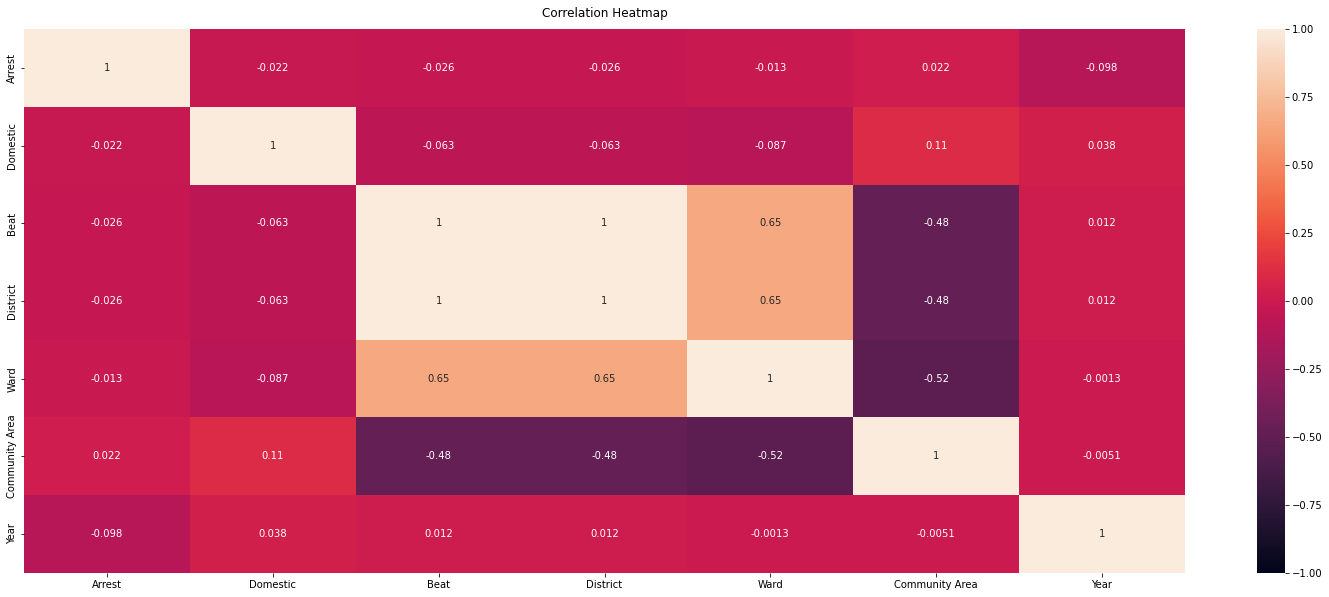

In [63]:
plt.figure(figsize=(26, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [64]:
# Count of different primary type theft
pt = df[['Primary Type']]
crime_count = pd.DataFrame(pt.groupby('Primary Type').size().sort_values(ascending=False).rename('pt counts').reset_index())
crime_count

,Primary Type,pt counts
0,THEFT,22435
1,BATTERY,19072
2,CRIMINAL DAMAGE,11036
3,ASSAULT,8461
4,DECEPTIVE PRACTICE,7398
5,OTHER OFFENSE,6308
6,MOTOR VEHICLE THEFT,4575
7,NARCOTICS,3974
8,BURGLARY,3715
9,ROBBERY,3654


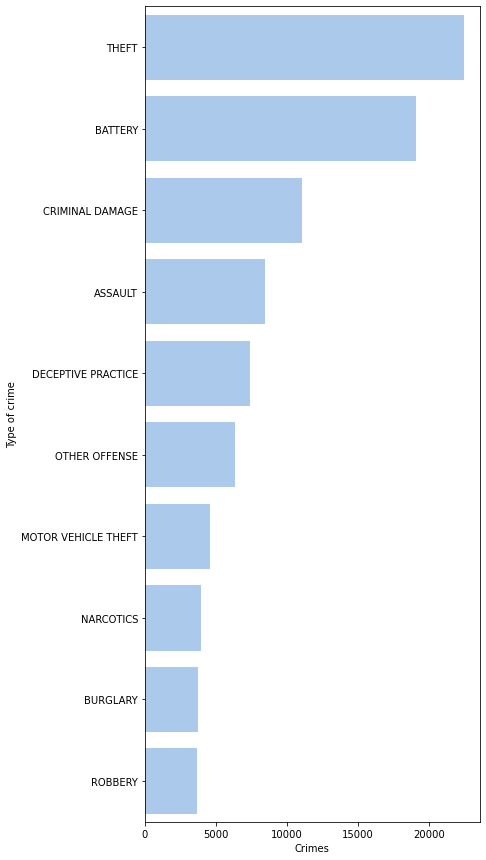

In [66]:
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes("pastel")
sns.barplot(x="pt counts", y="Primary Type", data=crime_count.iloc[:10, :],
            label="Total", color="b")

ax.set(ylabel="Type of crime", xlabel="Crimes")

plt.show()

In [67]:
# Analyzing for which primary type more arrest has occured
df2 = df.groupby('Primary Type')[['Arrest']].count().reset_index()
df2 = df2.sort_values(by='Arrest').reset_index()
df2 = df2.tail(10)

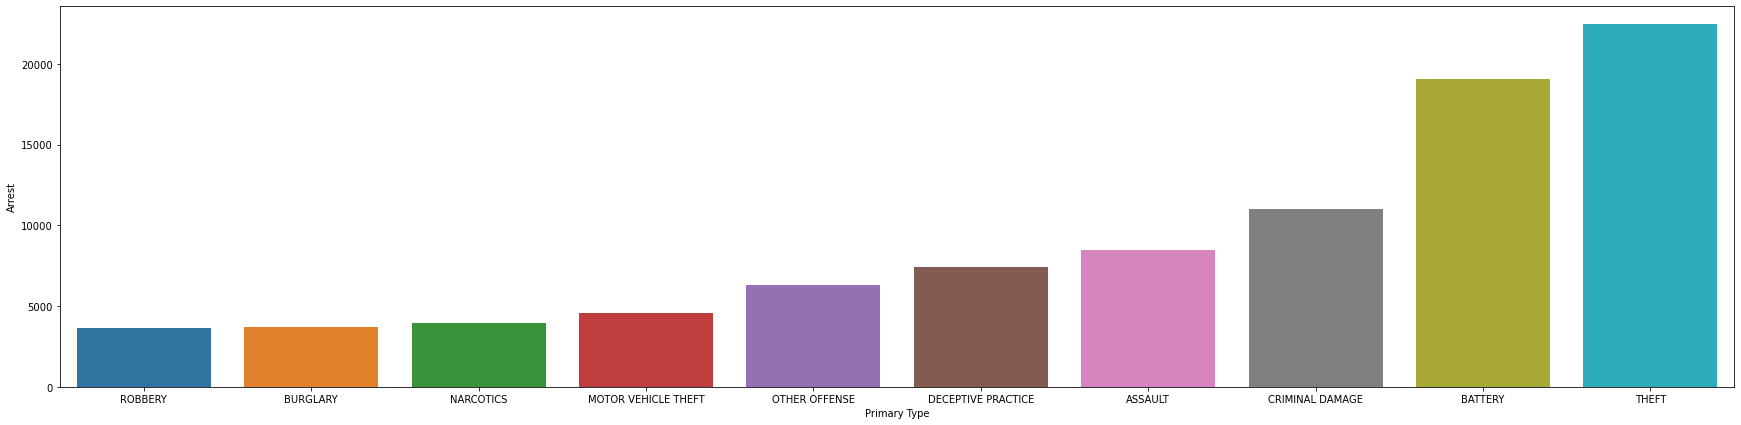

In [68]:
f, ax = plt.subplots(figsize=(30, 7))

sns.set_color_codes("pastel")
sns.barplot(x="Primary Type", y="Arrest", data=df2.iloc[:, :])
           
ax.set(ylabel="Arrest", xlabel="Primary Type")

plt.show()

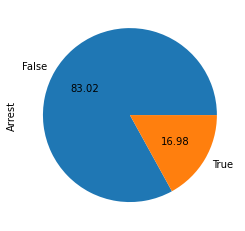

In [69]:
# To understand the percentage of arrest and not arrest
df['Arrest'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [70]:
#Grouping the primary type based on different districts to see the crime occurred across all districts
new_df = df.groupby('District')[['Primary Type']].count().reset_index()
new_df = new_df.sort_values(by='Primary Type').reset_index()

new_df

,index,District,Primary Type
0,22,31.0,1
1,18,20.0,1908
2,15,17.0,2688
3,20,24.0,3285
4,19,22.0,3297
5,12,14.0,3373
6,14,16.0,3463
7,13,15.0,3937
8,8,9.0,4254
9,1,2.0,4515


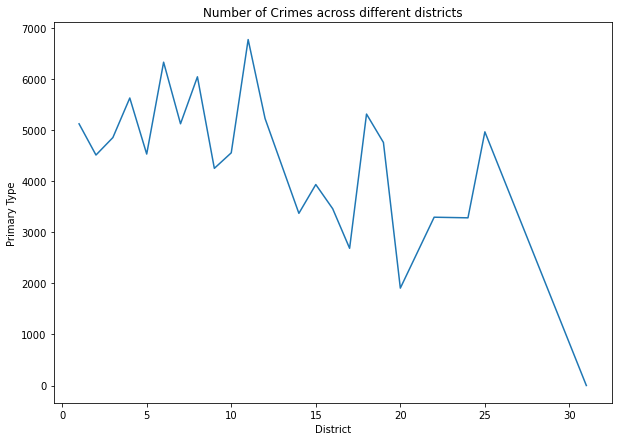

In [71]:
f, ax = plt.subplots(figsize=(10, 7))

sns.lineplot(data=new_df, x="District", y="Primary Type")

plt.title('Number of Crimes across different districts')

plt.show()

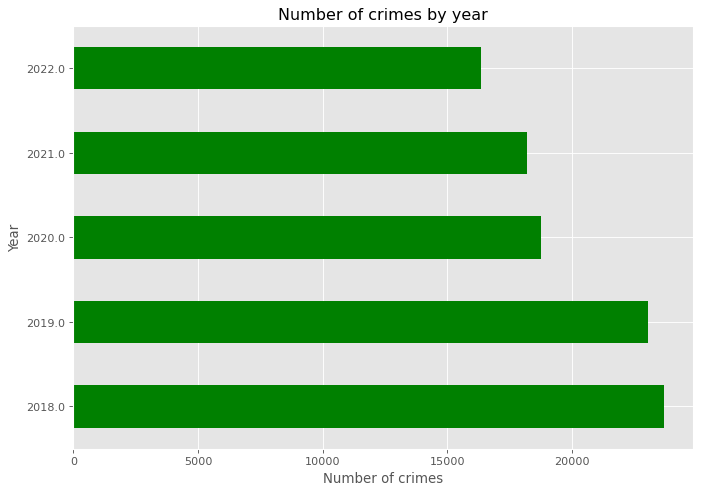

In [72]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7), dpi=80)
final_df.groupby([df.Year]).size().plot(kind='barh', color='green')

plt.ylabel('Year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by year')
plt.show()

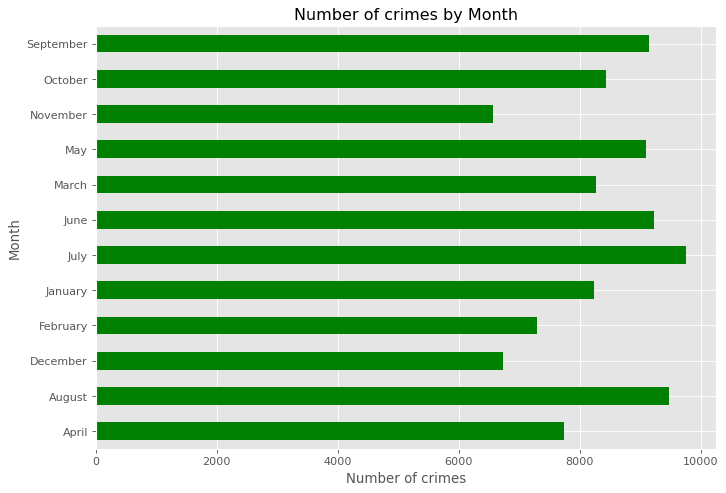

In [73]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 7), dpi=80)
final_df.groupby([df.Month]).size().plot(kind='barh', color='green')

plt.ylabel('Month')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by Month')
plt.show()

In [53]:
# Crime data with IUCR and primary type with top most 5 Primary type theft happening in IUCR code
IUCR_df = crimedata[['IUCR','Primary Type']].value_counts().head(5)
IUCR_df

IUCR  Primary Type
0486  BATTERY         9159
0820  THEFT           8639
0810  THEFT           6209
0460  BATTERY         5930
0560  ASSAULT         5519
dtype: int64

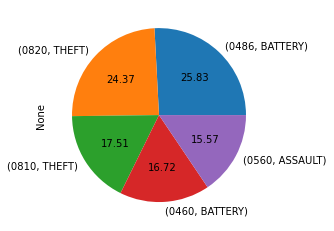

In [12]:
IUCR_df.plot(kind="pie", autopct="%.2f")
plt.show()